In [46]:
import numpy as np
import matplotlib.pyplot as plt


# Plane Wave Illumination


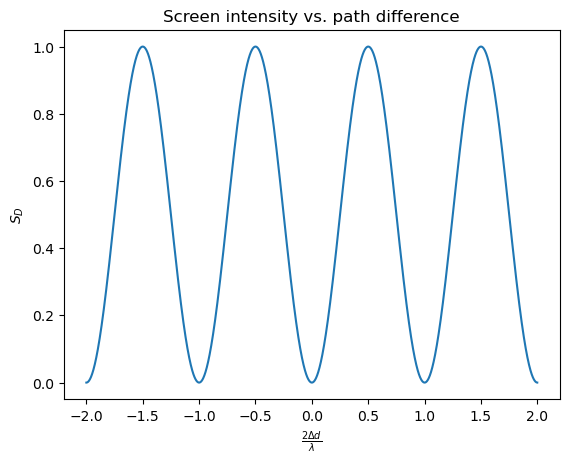

In [68]:
# Optical path length varied when M1I and M2 are parallel (theta=0)
Nmax = 2
SD = []
for i in np.arange(-Nmax, Nmax, 0.001):
    SD.append((np.sin(i * np.pi)) ** 2)
plt.plot(np.arange(-Nmax, Nmax, 0.001), SD)
plt.title("Screen intensity vs. path difference")
plt.xlabel(r"$\frac{2\Delta d}{\lambda}$")
plt.ylabel(r"$S_{D}$")
plt.savefig("Screen intensity vs optical path.png")
plt.show()


In [69]:
# M2 is tilted by theta/2 and kept fixed
wL = 700e-9  # wavelength[m]
dM = 1.85 * wL  # mirror separation[m]
theta = 30  # 2*tilt-angle [deg]
L = 5e-6  # detector dimensions[m]
nD = 501  # number of grid points
k = 2 * np.pi / wL  # propagation constant[1/m]
xD = np.linspace(-L, L, nD)  # x-coordinates
yD = np.copy(xD)  # y-coordiantes
zD = 1  # z-coordiante
dF = wL / np.sin(np.deg2rad(theta))  # Fringe spacing[m]
E1 = np.zeros((nD, nD), dtype="complex_")
E2 = np.copy(E1)
print("Fringe Spacing", dF, "m")


Fringe Spacing 1.4000000000000001e-06 m


In [70]:
# Electric field at detector
for i in range(1, nD):
    E1[:, i] = np.exp(1j * k * (zD + 2 * dM))
    E2[:, i] = np.exp(
        1j
        * (k * zD * np.cos(np.deg2rad(theta)) + k * xD[i] * np.sin(np.deg2rad(theta)))
    )
Etot = E1 + E2


In [71]:
# Detector screen intensity
SD = np.real(Etot*np.conj(Etot))
SD = SD / np.max(SD)


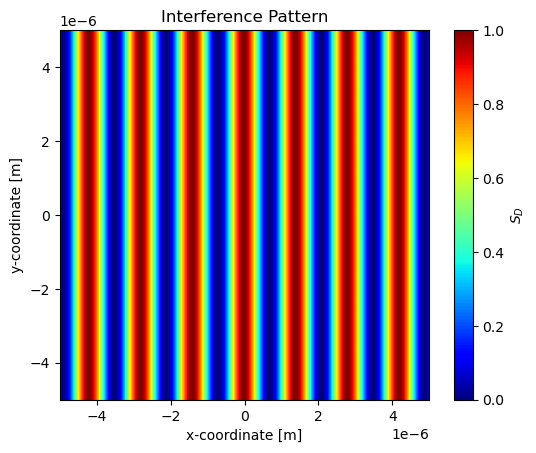

In [72]:
# Interference pattern
plt.imshow(SD, extent=[-L, L, -L, L], cmap=plt.cm.jet)
plt.colorbar(label=r"$S_{D}$")
plt.title("Interference Pattern")
plt.xlabel("x-coordinate [m]")
plt.ylabel("y-coordinate [m]")
plt.savefig("Interference pattern when M2 is tilted and fixed.png")
plt.show()


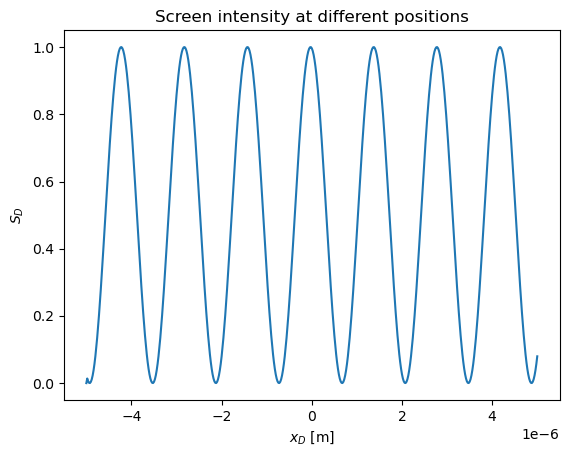

In [86]:
# Screen intensity at different positions
plt.plot(xD, SD[2, :])
plt.title("Screen intensity at different positions")
plt.xlabel(r"$x_{D}$ [m]")
plt.ylabel(r"$S_{D}$")
plt.savefig("Screen intensity at different positions.png")
plt.show()


# Illumination by Monochromatic Point Source

In [76]:
wL = 550e-9  # wavelength[m]
Np = 1559  # number of gridpoints
Amax = 5  # max-viewing-angle [deg]
S21 = 1e-3  # disntance between source points 1 and 2
k = 2 * np.pi / wL  # angular wave number [rad/m]
ns = 2  # number of sources
zSP = 0.2  # axial distance between source points 1 and screen

# Detector coordiantes
pmax = zSP * np.tan(np.deg2rad(Amax))
pmin = -pmax
dp = (pmax - pmin) / Np
p = np.arange(pmin, pmax, dp)
xp = np.zeros((Np, Np))
yp = np.zeros((Np, Np))
zp = zSP * np.ones((Np, Np))

for i in range(Np):
    xp[:, i] = p[i]
    yp[i, :] = -p[i]

E = np.zeros((Np, Np), dtype="complex_")  # Electrice field from point sources
S = np.zeros((ns, 3))  # Coordinate of source points
S[0, :] = [0, 0, 0]
S[1, :] = [0, 0, S21]

phi = np.zeros((ns, 1))  # phase changes
phi[0] = 0
phi[1] = np.pi

for i in range(ns):
    xs = S[i, 0]
    ys = S[i, 1]
    zs = S[i, 2]

    # Distance matrix d: distance from source points S to detector points P
    dx = xp - xs
    dy = yp - ys
    dz = zp - zs

    dx = dx * dx
    dy = dy * dy
    dz = dz * dz

    d = dx + dy + dz
    d = np.sqrt(d)

    E = E + np.exp(1j * k * d + 1j * phi[i]) / d

# Intensity on Detector Screen
I = np.real(E * np.conj(E))
I = I / np.max(I)


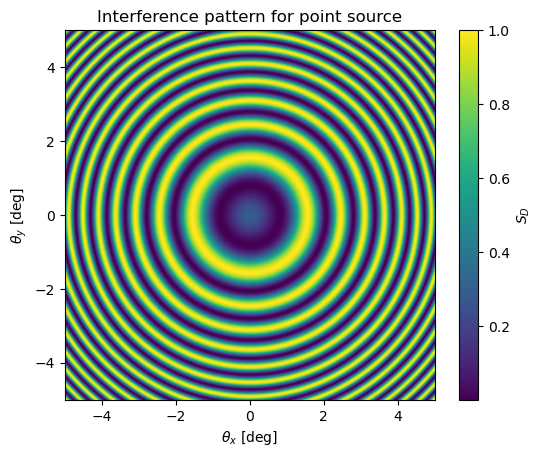

In [77]:
# Interference pattern
plt.imshow(I, extent = [-Amax,Amax,-Amax,Amax])
plt.title("Interference pattern for point source")
plt.xlabel(r"$\theta_{x}$ [deg]")
plt.ylabel(r"$\theta_{y}$ [deg]")
plt.colorbar(label=r"$S_{D}$")
plt.savefig("Interference pattern for point source.png")
plt.show()

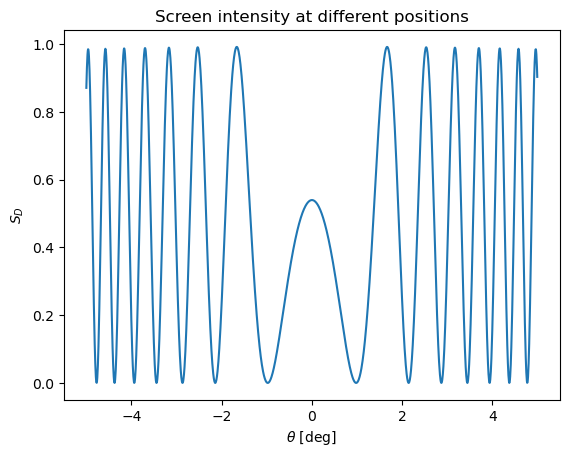

In [85]:
# Screen intensity at different positions
plt.plot(np.rad2deg(np.arctan(p/zSP)), I[2, :])
plt.title("Screen intensity at different positions")
plt.xlabel(r"$\theta$ [deg]")
plt.ylabel(r"$S_{D}$")
plt.savefig("Screen intensity at different positions for point source.png")
plt.show()
